In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
model_3 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

d:\Engineering\PROJECTS\AI Bootcamp\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
result = model_3.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8200 - loss: 0.4954 - val_accuracy: 0.8376 - val_loss: 0.4408
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8628 - loss: 0.3746 - val_accuracy: 0.8667 - val_loss: 0.3618
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8754 - loss: 0.3348 - val_accuracy: 0.8753 - val_loss: 0.3501
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8865 - loss: 0.3071 - val_accuracy: 0.8768 - val_loss: 0.3426
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8918 - loss: 0.2892 - val_accuracy: 0.8823 - val_loss: 0.3404
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8975 - loss: 0.2733 - val_accuracy: 0.8754 - val_loss: 0.3556
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9016 - loss: 0.2632 - val_accuracy: 0.8841 - val_loss: 0.3211
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9051 -

In [5]:
(loss , accuracy) = model_3.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8797 - loss: 0.3708
Test Loss: 0.37
Test Accuracy: 87.97%
{'accuracy': [0.8199583292007446, 0.8628333210945129, 0.8753541707992554, 0.8864791393280029, 0.8918125033378601, 0.8974791765213013, 0.9016249775886536, 0.9050833582878113, 0.9065208435058594, 0.9116041660308838], 'loss': [0.4954271912574768, 0.37462589144706726, 0.3347682058811188, 0.3070507347583771, 0.28920698165893555, 0.2732522189617157, 0.263227254152298, 0.2516137957572937, 0.24275365471839905, 0.22951897978782654], 'val_accuracy': [0.8375833630561829, 0.8666666746139526, 0.875333309173584, 0.8768333196640015, 0.8822500109672546, 0.8754166960716248, 0.8840833306312561, 0.8885833621025085, 0.887583315372467, 0.8855000138282776], 'val_loss': [0.44081830978393555, 0.3618498146533966, 0.3501284122467041, 0.3425939083099365, 0.3403909504413605, 0.35557565093040466, 0.3211270570755005, 0.3318396508693695, 0.32036092877388, 0.3454234302043915]}


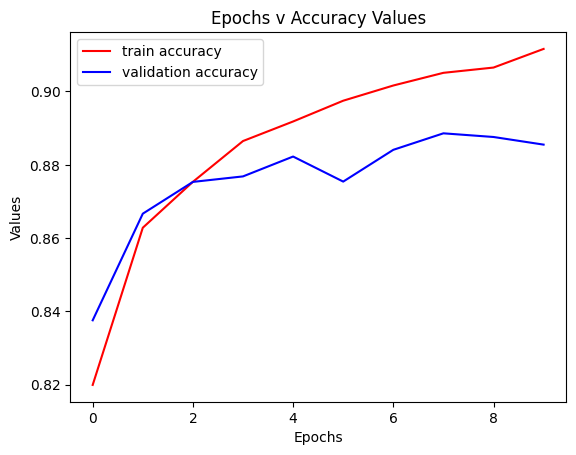

In [7]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

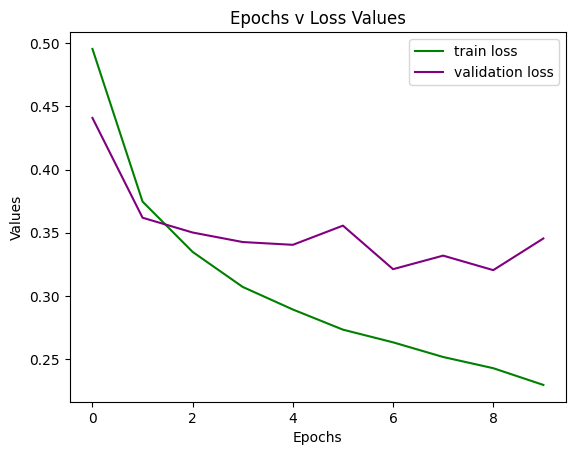

In [8]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()